In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm


In [6]:
# Why did I create this? 
# I created this script due to boredam and lack of motivation to study for my stats final. 

# inputs
numValues = 70 # size of the samples in the distribution
maxValue = 80 #seems to be where the highest point of the curve is centered - mean?
runs = 10000 #simulation runs
skewness = 500 # Negative values are left skewed, positive values are right skewed.
uncle_max = []
mu = 75 # average for all non-final grades as a %
sigma = 15 # sd for all non-final grades as a %
non_final_weight = .55 # weighting for all non-final related work
final_weight = .45 # weighting for the final exam


In [7]:
#simulated runs of the distribution of the class distribution
for i in range(10000):      
    random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues)  #Skewnorm function
    class_non_final = np.random.normal(mu, sigma, numValues)
    class_final_grade = final_weight * random + non_final_weight * class_non_final
    uncle_max.append(class_final_grade)






[[90.66099544 81.3268572  76.36762257 ... 79.16572685 90.2951801
  69.59412443]
 [81.9260038  68.34636116 78.48249651 ... 67.94217111 82.16872439
  59.22243786]
 [76.2268701  75.24230307 84.56296019 ... 87.43353408 75.67302787
  76.30632944]
 ...
 [82.79132836 65.50085277 72.29071621 ... 69.23175567 77.55593195
  70.76413765]
 [56.00928436 77.3766104  82.47717332 ... 69.1348268  76.19790001
  77.24448869]
 [71.81561416 79.42427181 70.28638679 ... 64.83042142 86.87053034
  76.38414912]]
Enter your estimated non-final grade as a %: 101
Invalid integer. The number must be in the range of 0-100.
Enter your estimated non-final grade as a %: 99
Enter your estimated non-final grade as a %: 200
Invalid integer. The number must be in the range of 0-100.
Enter your estimated non-final grade as a %: 000
You Fail! HAHAHAHAHAHA


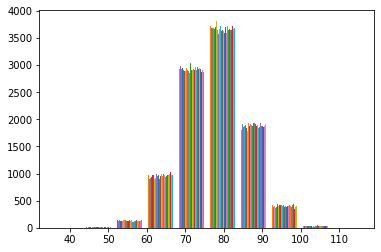

In [8]:
uncle_max_array = np.asarray(uncle_max)
uncle_max_array_2 = np.concatenate(uncle_max)    

#delete values over 100
indexArr = np.argwhere(uncle_max_array > 100)
uncle_max_array_2 = np.delete(uncle_max_array, indexArr)
print(uncle_max_array)

#failure cutoff at 2% quantile 
quantile = np.quantile(uncle_max_array_2, 0.005)

#user_non_final = int(input("Enter your estimated non-final grade as a %:"))

while True:
    try:
        user_non_final = int(input("Enter your estimated non-final grade as a %: "))
        if user_non_final < 0 or user_non_final > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 0-100.")

while True:
    try:
        user_final = int(input("Enter your estimated non-final grade as a %: "))
        if user_final < 0 or user_final > 100:
            raise ValueError #this will send it to the print message and back to the input option
        break
    except ValueError:
        print("Invalid integer. The number must be in the range of 0-100.")
        
                
if final_weight * user_final + non_final_weight * user_non_final > quantile:
    print("You Pass!!!!")
else:
    print("You Fail! HAHAHAHAHAHA")   
          
#user_final = int(input("Enter your estimated final grade:"))



plt.hist(uncle_max_array)
plt.show()